In [1]:
from random import *
import math
import matplotlib.pyplot
populacao = []
TAM = 100
i = 0
num_geracoes = 500
taxa_CrossOver = 100
taxa_mutacao = 0.1
maiores = []
menores = []
media_ger = []

In [2]:
#-----------Cria a populacao------------------
while(i<TAM):
    v = [uniform(0,10),uniform(0,10),0]
    populacao = populacao + [v]
    i = i+1

print(populacao[0],populacao[1])
print("....")
print(populacao[TAM-1])

[7.791251644540057, 9.33871924584423, 0] [5.876627644598424, 7.473604226334807, 0]
....
[8.018167594008407, 1.4352239698489655, 0]


In [3]:
#----------------Funcoes para aptidao---------------
def Alpine(x1,x2):
        return (x1**(1/2)* math.sin(x1))*(x2**(1/2)* math.sin(x2))
def funcaoObjetivo(populacao):
        sum =0
        for vetor in populacao :
            vetor[2] = Alpine(vetor[0] , vetor[1]) + 7
            sum += vetor[2]
        return sum

In [4]:
#--------------Funcoes para criar o grafico---------------------------
def obterMaior(populacao):
        maior = populacao[0]
        for v in populacao:
            if (v[2] > maior[2]):
                maior = v
        return maior
def obterMenor(populacao):
        menor = populacao[0]
        for v in populacao:
            if (v[2] < menor[2]):
                menor = v
        return menor


In [5]:
#----------------Funcao para selecao---------------
def encontrarPai(faixa,populacao):
            Ai = 0
            for v in populacao:
                Ai += v[2]
                if Ai >= faixa:
                    return v


In [6]:
#---------------Funcao de Cruzamento------------------------
def encontrarFilho(pai1, pai2):
            alpha = uniform(0, 1)
            filho = [alpha * pai1[0] + (1 - alpha) * pai2[0], alpha * pai1[1] + (1 - alpha) * pai2[1],0]
            return filho

In [7]:
#-------------Funcao de mutacao-------------------------
def mutar(filho):
            libera = randint(0,100)
            if(libera < taxa_mutacao):
                mutacao = uniform(-1,1)
                if(filho + mutacao >= 0):
                    filho = filho+mutacao
            return filho

In [8]:
l = 0
while l<= num_geracoes:
    #--------------Descobre Aptidao---------------------
    sum = funcaoObjetivo(populacao)
     # ----------Estudo da geracao--------------------
    maior = obterMaior(populacao)
    menor = obterMenor(populacao)
    media = sum/TAM
    maiores.append(maior[2])
    menores.append(menor[2])
    media_ger.append(media)
    for j in range(0,TAM-1):
        #---------------------Selecionar------------------------
        sum = funcaoObjetivo(populacao)
        faixa = uniform(0,sum)
        pai1 = encontrarPai(faixa,populacao)
        faixa = uniform(0,sum)
        pai2 = encontrarPai(faixa,populacao)
        #----------------CrossOver-----------------------------
        index1 = populacao.index(pai1)
        index2 = populacao.index(pai2)
        libera = randint(0,100)
        if(libera<taxa_CrossOver):
            filho1 = encontrarFilho(pai1,pai2)
            filho2 = encontrarFilho(pai2,pai1)
        else :
            filho1 = pai1
            filho2 = pai2

        #------------Mutacao-------------------
        filho1[0] = mutar(filho1[0])
        filho1[1] = mutar(filho1[1])
        filho2[0] = mutar(filho2[0])
        filho2[1] = mutar(filho2[1])
        #----------Substituicao---------------
        populacao[index1] = filho1
        populacao[index2] = filho2


    l = l+1

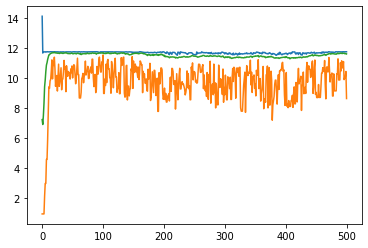

[4.827781607532642, 4.820458645492127, 11.764080683612562]


In [9]:
#-------------Criando o grafico-------------------------------
geracoes =[]
for v in range(0,num_geracoes+1):
    geracoes = geracoes +[v]
    
matplotlib.pyplot.plot(geracoes,maiores)
matplotlib.pyplot.plot(geracoes,menores)
matplotlib.pyplot.plot(geracoes,media_ger)
matplotlib.pyplot.show()
print(maior)